In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing    #for normalizing
from sklearn.model_selection import train_test_split   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/My Drive/5155-hw1/drug_consumption.data")

In [ ]:
columns = ["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore",
           "Oscore","Ascore","Cscore","Impulsive","SS","Alcohol","Amphet","Amyl",
           "Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin",
           "Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]

In [ ]:
df.to_excel("/content/drive/My Drive/5155-hw1/drug_consumption.xlsx")

In [ ]:
df.columns = columns

In [ ]:
df.drop("ID",axis = 1,inplace = True)

In [ ]:
#check with the data description to make sure the data is correct
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,0.034364,-0.000512,-0.003777,0.355221,-0.309808,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,0.878529,0.482588,0.950330,0.700382,0.165967,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
temp = df.loc[:,"Alcohol":"VSA"]

In [ ]:
for c in temp:
  # print(c)
  temp[c].replace(['CL0','CL1'],'Non-user',inplace = True)
  temp[c].replace(['CL2','CL3','CL4','CL5','CL6'],'User',inplace = True)

In [ ]:
temp.describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
freq,1816,1206,1514,1116,1847,1265,1849,1197,1693,1133,1672,1534,1122,1327,1467,1190,1263,1878,1654


In [ ]:
temp.to_csv("/content/drive/My Drive/5155-hw1/temp.csv")

In [ ]:
df.loc[:,"Alcohol":"VSA"] = temp.loc[:,"Alcohol":"VSA"]

In [ ]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user,Non-user
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,Non-user,Non-user,Non-user,User,User,Non-user,Non-user,Non-user,Non-user,User
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,User,Non-user,Non-user,User,User,User,User,User,Non-user,Non-user
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user,Non-user
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,User,Non-user,Non-user,User,User,Non-user,User,User,Non-user,Non-user


In [ ]:
X = df.loc[:,"Age":"SS"]

In [ ]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


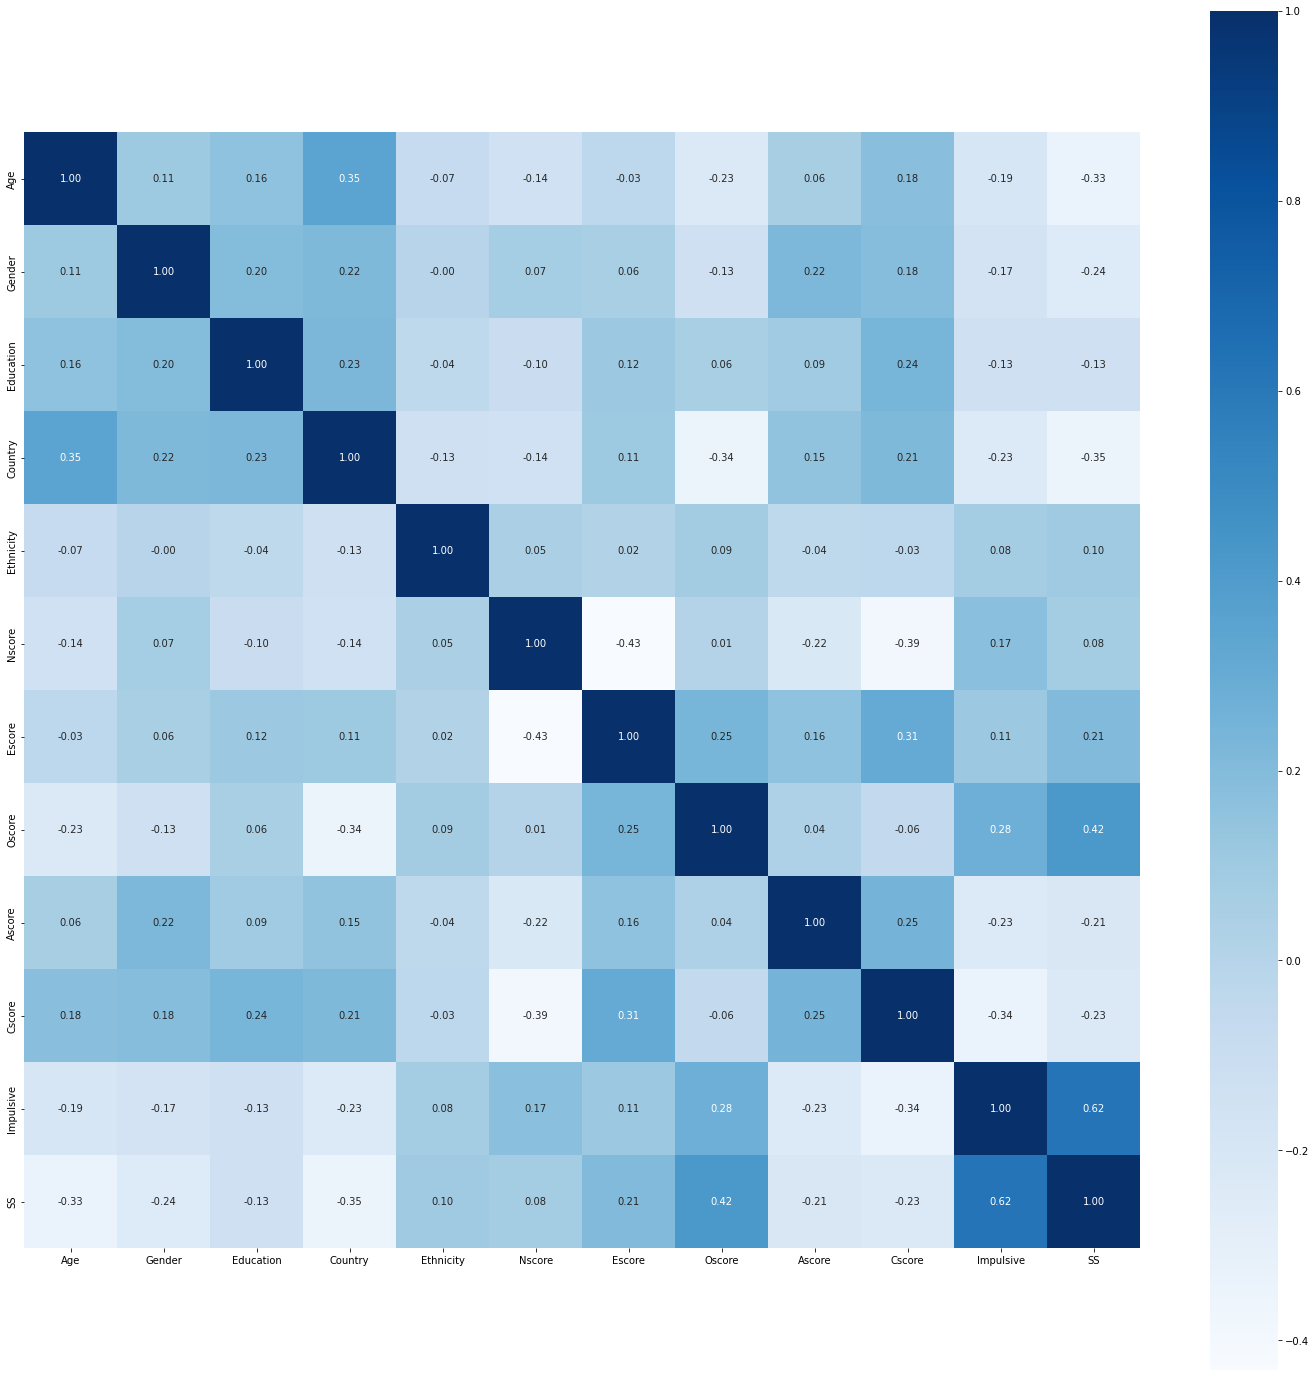

In [ ]:
plt.figure(figsize = (25,25))
corr_values1 = X.corr() 
sns.heatmap(corr_values1, annot=True,vmax=1, square=True, cmap="Blues",fmt='.2f')

In [ ]:
#Impulse and SS are highly correlated
X.drop('SS',axis = 1,inplace = True)

In [ ]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983
...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221


In [ ]:
#select 6 labels
labels = []
for col in df.loc[:,'Alcohol':'Cannabis']:
  labels.append(col)

In [ ]:
labels

['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis']

In [ ]:
df[labels].describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis
count,1884,1884,1884,1884,1884,1884
unique,2,2,2,2,2,2
top,User,Non-user,Non-user,Non-user,User,User
freq,1816,1206,1514,1116,1847,1265


In [ ]:
import warnings
warnings.filterwarnings("ignore")

svm confusion_matrix: [[547   0]
 [ 19   0]]
svm accuracy: 0.9664310954063604
svm Presion: [0.9664311 0.       ]
svm Recall: [1. 0.]
rf confusion_matrix: [[547   0]
 [ 19   0]]
rf accuracy: 0.9664310954063604
rf Presion: [0.9664311 0.       ]
rf Recall: [1. 0.]
dt confusion_matrix: [[519  28]
 [ 18   1]]
dt accuracy: 0.9187279151943463
dt Presion: [0.96648045 0.03448276]
dt Recall: [0.9488117  0.05263158]
knn confusion_matrix: [[547   0]
 [ 18   1]]
knn accuracy: 0.9681978798586572
knn Presion: [0.96814159 1.        ]
knn Recall: [1.         0.05263158]


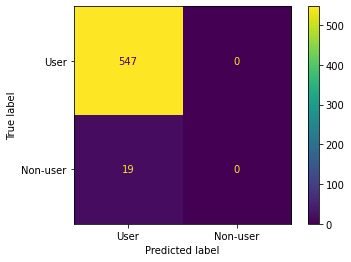

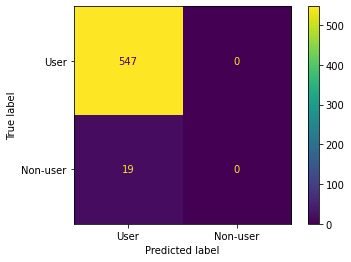

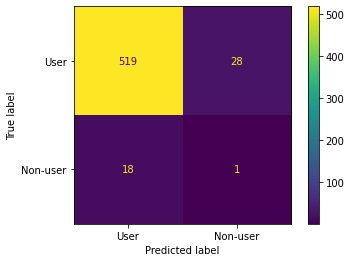

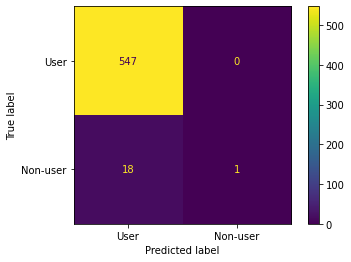

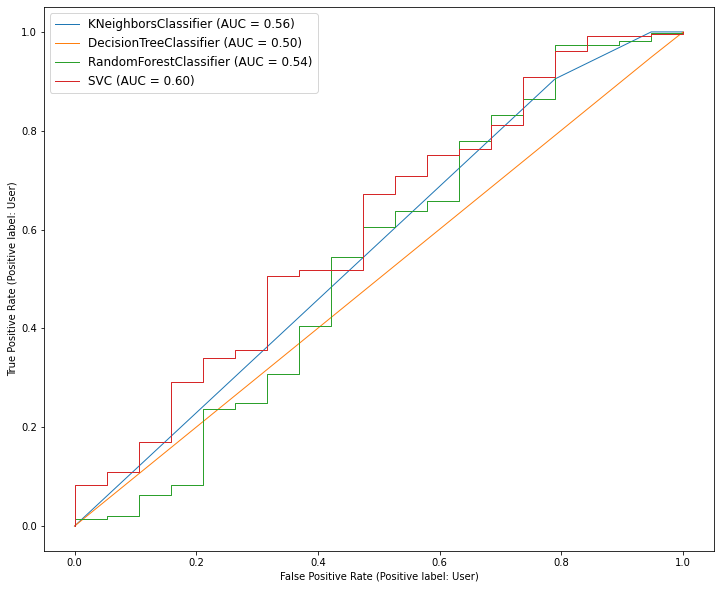

svm confusion_matrix: [[108  92]
 [ 53 313]]
svm accuracy: 0.7438162544169611
svm Presion: [0.67080745 0.77283951]
svm Recall: [0.54       0.85519126]
rf confusion_matrix: [[ 70 130]
 [ 31 335]]
rf accuracy: 0.715547703180212
rf Presion: [0.69306931 0.72043011]
rf Recall: [0.35       0.91530055]
dt confusion_matrix: [[102  98]
 [101 265]]
dt accuracy: 0.6484098939929329
dt Presion: [0.50246305 0.73002755]
dt Recall: [0.51       0.72404372]
knn confusion_matrix: [[104  96]
 [ 68 298]]
knn accuracy: 0.7102473498233216
knn Presion: [0.60465116 0.75634518]
knn Recall: [0.52       0.81420765]


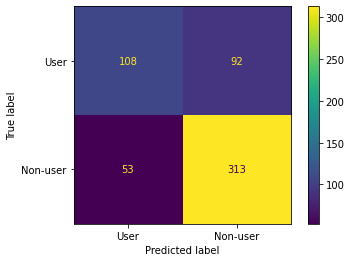

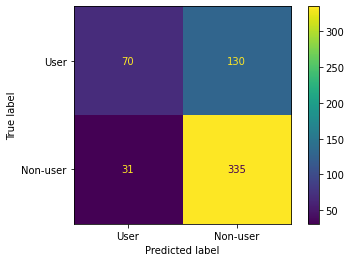

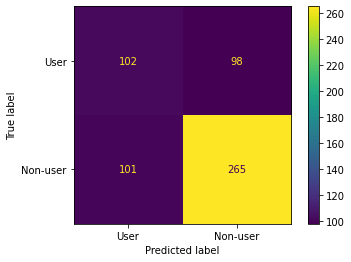

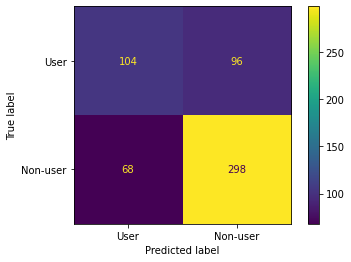

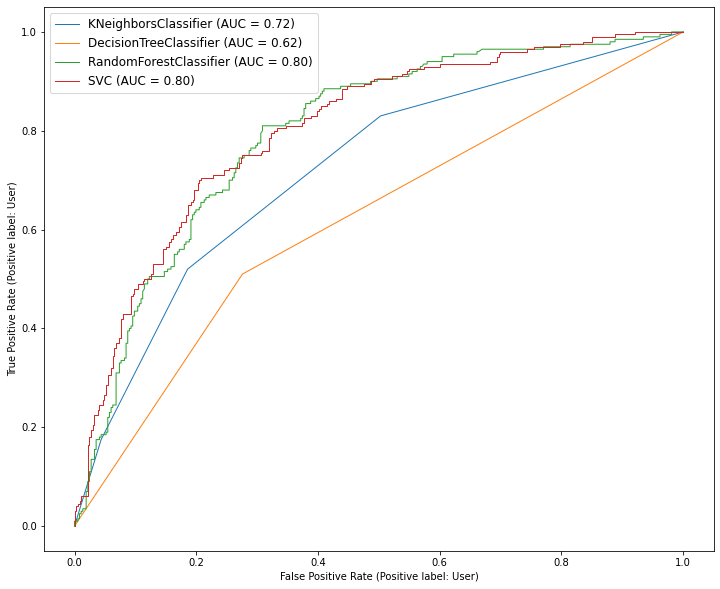

svm confusion_matrix: [[  5  99]
 [  6 456]]
svm accuracy: 0.8144876325088339
svm Presion: [0.45454545 0.82162162]
svm Recall: [0.04807692 0.98701299]
rf confusion_matrix: [[  0 104]
 [  0 462]]
rf accuracy: 0.8162544169611308
rf Presion: [0.         0.81625442]
rf Recall: [0. 1.]
dt confusion_matrix: [[ 24  80]
 [ 88 374]]
dt accuracy: 0.7031802120141343
dt Presion: [0.21428571 0.82378855]
dt Recall: [0.23076923 0.80952381]
knn confusion_matrix: [[ 29  75]
 [ 54 408]]
knn accuracy: 0.7720848056537103
knn Presion: [0.34939759 0.8447205 ]
knn Recall: [0.27884615 0.88311688]


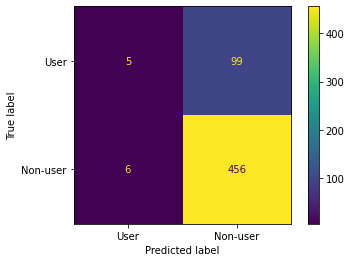

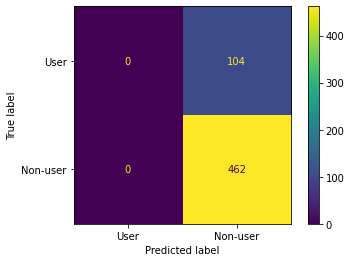

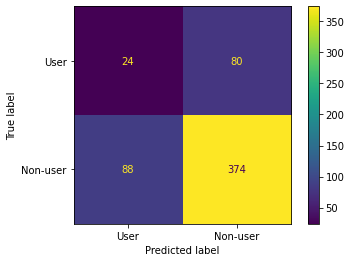

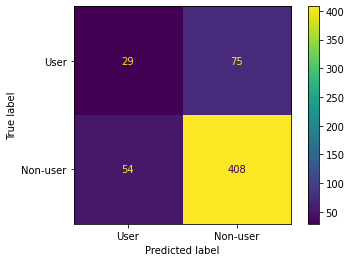

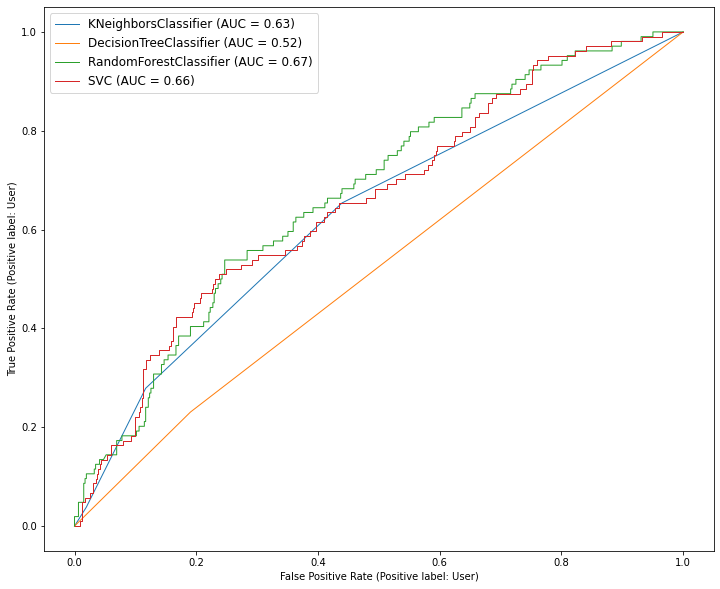

svm confusion_matrix: [[144  98]
 [ 63 261]]
svm accuracy: 0.715547703180212
svm Presion: [0.69565217 0.7270195 ]
svm Recall: [0.59504132 0.80555556]
rf confusion_matrix: [[101 141]
 [ 40 284]]
rf accuracy: 0.6802120141342756
rf Presion: [0.71631206 0.66823529]
rf Recall: [0.41735537 0.87654321]
dt confusion_matrix: [[125 117]
 [103 221]]
dt accuracy: 0.6113074204946997
dt Presion: [0.54824561 0.65384615]
dt Recall: [0.51652893 0.68209877]
knn confusion_matrix: [[141 101]
 [ 76 248]]
knn accuracy: 0.6872791519434629
knn Presion: [0.64976959 0.71060172]
knn Recall: [0.58264463 0.7654321 ]


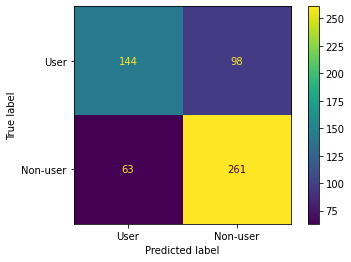

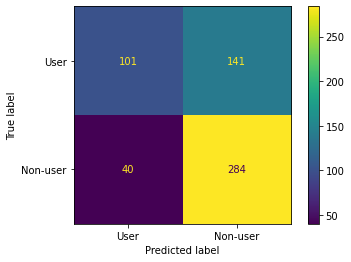

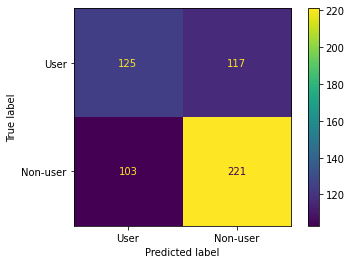

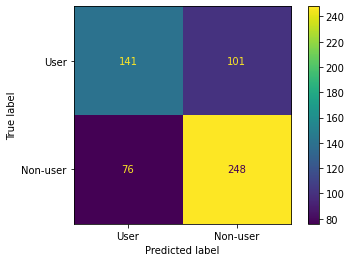

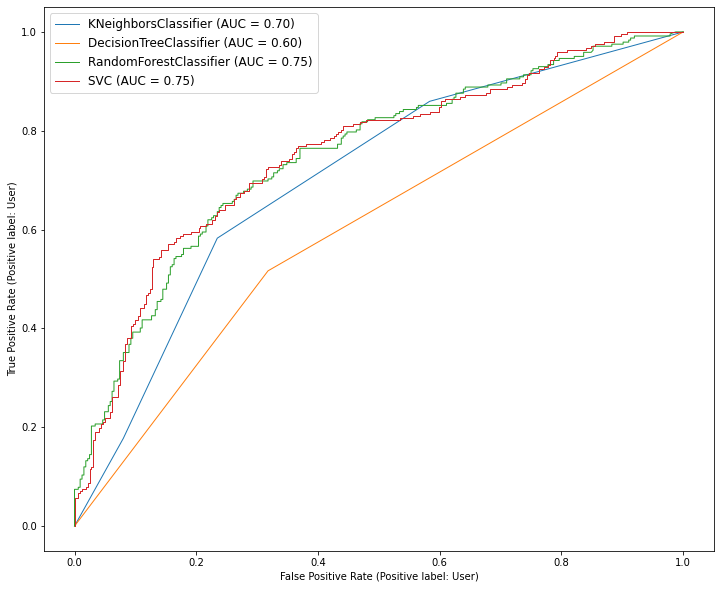

svm confusion_matrix: [[556   0]
 [ 10   0]]
svm accuracy: 0.9823321554770318
svm Presion: [0.98233216 0.        ]
svm Recall: [1. 0.]
rf confusion_matrix: [[556   0]
 [ 10   0]]
rf accuracy: 0.9823321554770318
rf Presion: [0.98233216 0.        ]
rf Recall: [1. 0.]
dt confusion_matrix: [[535  21]
 [  9   1]]
dt accuracy: 0.9469964664310954
dt Presion: [0.98345588 0.04545455]
dt Recall: [0.96223022 0.1       ]
knn confusion_matrix: [[555   1]
 [ 10   0]]
knn accuracy: 0.980565371024735
knn Presion: [0.98230088 0.        ]
knn Recall: [0.99820144 0.        ]


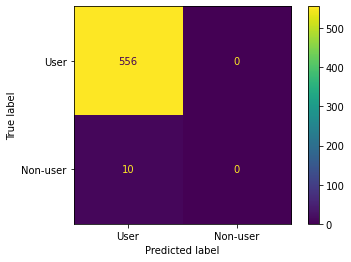

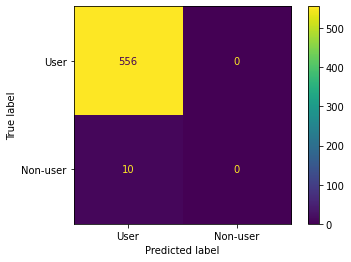

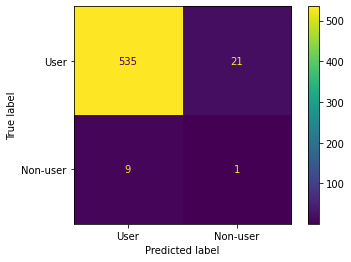

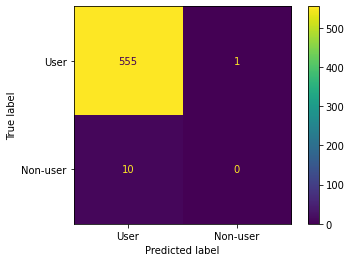

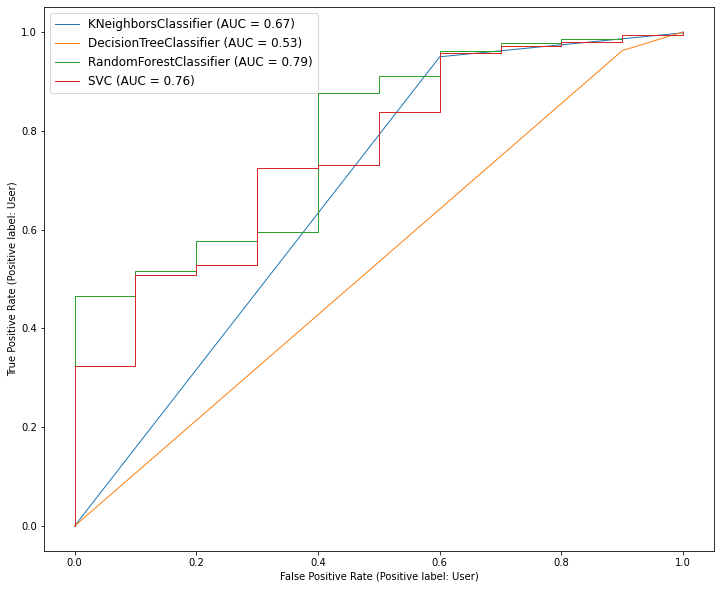

svm confusion_matrix: [[315  54]
 [ 67 130]]
svm accuracy: 0.7862190812720848
svm Presion: [0.82460733 0.70652174]
svm Recall: [0.85365854 0.65989848]
rf confusion_matrix: [[342  27]
 [114  83]]
rf accuracy: 0.7508833922261484
rf Presion: [0.75       0.75454545]
rf Recall: [0.92682927 0.4213198 ]
dt confusion_matrix: [[293  76]
 [ 74 123]]
dt accuracy: 0.734982332155477
dt Presion: [0.79836512 0.61809045]
dt Recall: [0.79403794 0.62436548]
knn confusion_matrix: [[298  71]
 [ 67 130]]
knn accuracy: 0.7561837455830389
knn Presion: [0.81643836 0.64676617]
knn Recall: [0.80758808 0.65989848]


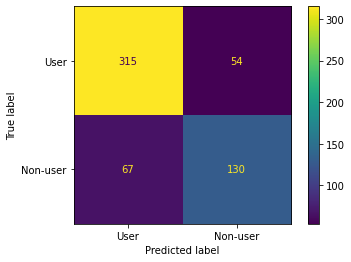

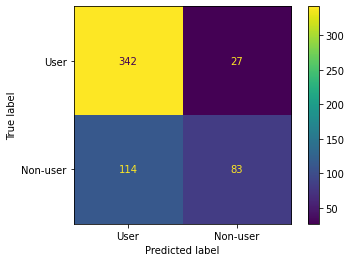

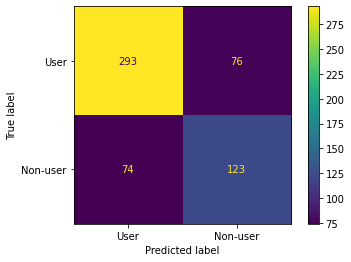

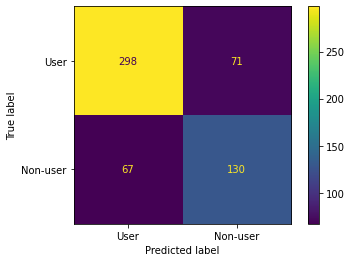

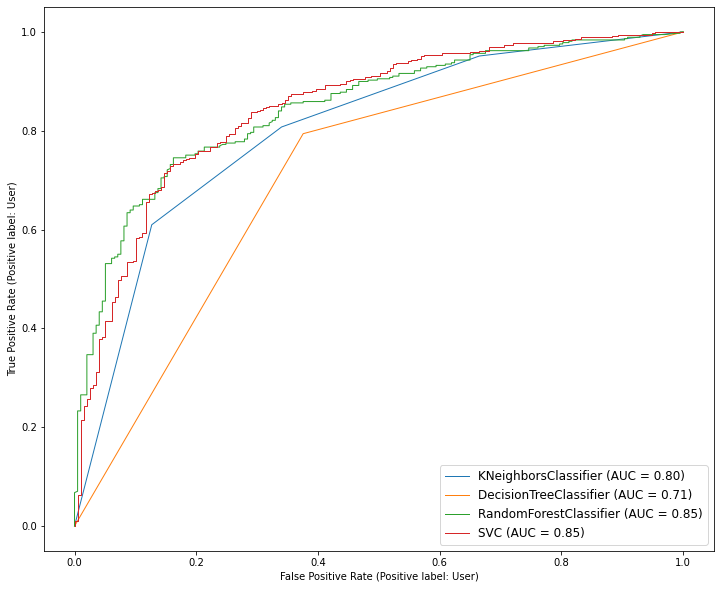

In [ ]:
#model construction and evaluation
for i in range(len(labels)):
  y = df[labels[i]]
  X = preprocessing.scale(X)
  x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
  label = ['User','Non-user']

  #svm
  svm_clf = SVC()
  svm_clf.fit(x_train, y_train)
  y_pred_svm = svm_clf.predict(x_test)
  p_svm, r_svm, f_svm, support_svm=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_svm, labels=label)
  cm_svm = confusion_matrix(y_test, y_pred_svm, labels = label)

  print("svm confusion_matrix:",cm_svm)
  cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=label)
  cmd_svm.plot()
  
  print("svm accuracy:",svm_clf.score(x_test, y_test))
  print("svm Presion:",p_svm)
  print("svm Recall:",r_svm)

  #rf
  rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
  rf_clf.fit(x_train, y_train)
  y_pred_rf = rf_clf.predict(x_test)
  p_rf, r_rf, f_rf, support_rf=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_rf, labels=label)
  cm_rf = confusion_matrix(y_test, y_pred_rf, labels = label)

  print("rf confusion_matrix:",cm_rf)
  cmd_rf = ConfusionMatrixDisplay(cm_rf, display_labels=label)
  cmd_rf.plot()
  
  print("rf accuracy:",rf_clf.score(x_test, y_test))
  print("rf Presion:",p_rf)
  print("rf Recall:",r_rf)

  #dt
  dt_clf = DecisionTreeClassifier(random_state=0)
  dt_clf.fit(x_train, y_train)
  y_pred_dt = dt_clf.predict(x_test)
  p_dt, r_dt, f_dt, support_dt=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_dt, labels=label)
  cm_dt = confusion_matrix(y_test, y_pred_dt, labels = label)

  print("dt confusion_matrix:",cm_dt)
  cmd_dt = ConfusionMatrixDisplay(cm_dt, display_labels=label)
  cmd_dt.plot()
  
  print("dt accuracy:",dt_clf.score(x_test, y_test))
  print("dt Presion:",p_dt)
  print("dt Recall:",r_dt)

  #knn
  knn_clf = KNeighborsClassifier(n_neighbors=3)
  knn_clf.fit(x_train, y_train)
  y_pred_knn = knn_clf.predict(x_test)
  p_knn, r_knn, f_knn, support_knn=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_knn, labels=label)
  cm_knn = confusion_matrix(y_test, y_pred_knn, labels = label)

  print("knn confusion_matrix:",cm_knn)
  cmd_knn = ConfusionMatrixDisplay(cm_knn, display_labels=label)
  cmd_knn.plot()
  
  print("knn accuracy:",knn_clf.score(x_test, y_test))
  print("knn Presion:",p_knn)
  print("knn Recall:",r_knn)

  #create plots
  fig,ax = plt.subplots(figsize=(12,10))
  knn_roc = plot_roc_curve(estimator = knn_clf, X=x_test, 
                        y=y_test, ax=ax, linewidth=1)
  dt_roc = plot_roc_curve(estimator = dt_clf, X=x_test,
                        y=y_test, ax=ax, linewidth=1)
  rf_roc = plot_roc_curve(estimator = rf_clf, X=x_test,y=y_test, ax=ax, linewidth=1)
  SVM_roc = plot_roc_curve(estimator = svm_clf,X = x_test,y = y_test,ax = ax, linewidth = 1)
  
  #alter the size of characters
  ax.legend(fontsize=12)

  #show the ROC curve
  plt.show()